# Machine Learning (Aprendizaje Automático)

In [1]:
# Librerias basicas
import numpy as np
import matplotlib.pyplot as plt

# Para calcular los errores
from sklearn import metrics
# Generamos datos de manera aleatoria, que sigan una distribucion cuadratica
N=20
lim_inf = 0
lim_sup = 1
#Usando una semilla
np.random.seed(2)

x = np.sort(np.random.rand(N))
y = np.cos(1.5 * np.pi * x) + np.random.randn(N) * 0.1

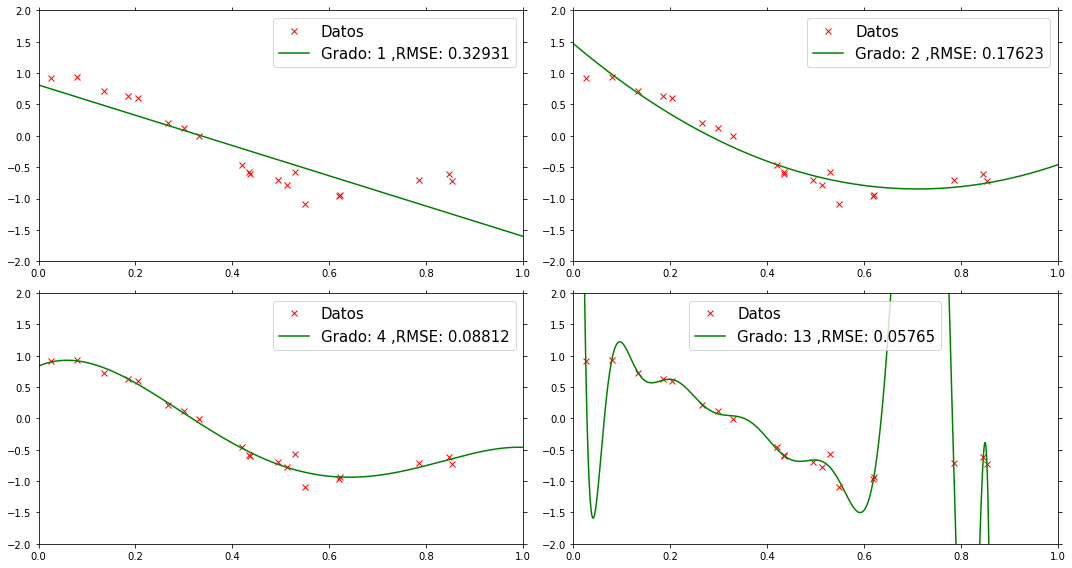

In [2]:
# Importemos el modulo de regresion lineal
from sklearn.linear_model import LinearRegression
# El modulo para ajustes polinomiales 
from sklearn.preprocessing import PolynomialFeatures
# Modulo para el pipeline
from sklearn.pipeline import Pipeline
# Creamos un pipeline y ajustamos los datos con un polinomio de grado 2

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15, 8))
Grado = [1,2,4,13]

for i in range(0,4):
    #Para producir los indices de los subplots
    r, c = (i) // 2, (i) % 2
    # Creamos un pipeline y ajustamos los datos con un polinomio de grado 
    Input=[('Polinomio',PolynomialFeatures(degree=Grado[i])),('Modo',LinearRegression())]
    pipe=Pipeline(Input)
    #reshape para tener vectores columna
    pipe.fit(x.reshape(-1,1),y.reshape(-1,1))
    #Prediccion
    poly_pred=pipe.predict(x.reshape(-1,1))
    #Error
    error = f'Grado: {Grado[i]} ,RMSE: {np.sqrt(metrics.mean_squared_error(y, poly_pred)):.5f}'
    #Ordenamos los datos respecto a las variables
    sorted_zip = sorted(zip(x,poly_pred))
    x_poly, poly_pred = zip(*sorted_zip)
    
    #Grafico
    #Para que se vea mejor las interpolaciones
    X_test = np.linspace(lim_inf, lim_sup, 1000)
    ax[r,c].clear()
    ax[r,c].plot(x, y,'x',color='red',label='Datos')
    ax[r,c].plot(X_test, pipe.predict(X_test.reshape(-1,1)),label=error, color='green')
    ax[r,c].legend(fontsize=15, loc="best")
    ax[r,c].set(xlim=(0, 1),ylim=(-2,2))
    
    
plt.tight_layout()
plt.show()


La figura de abajo a la derecha es el resultado de ajustar un orden polinomial de grado 13. Vemos que aunque la curva ajustada atraviesa los datos casi a la perfección y su RMSE es bajo, no esperaríamos que esto fuera un buen predictor. Sin definir formalmente lo que significan estos términos, diremos que las figuras de la arriba (izquierda y derecha) muestra un caso de _Under-fitting_ (sub-ajuste), en la que se muestran claramente que la estructura de los datos no es capturada por el modelo, y la figura de la abajo-derecha es un ejemplo de _Over'fitting_ (sobre-ajuste).

Un ajuste insuficiente, o un sesgo alto (_high bias_), es cuando la forma de la función de hipótesis $h$ se correlaciona mal con la tendencia de los datos. Suele deberse a una función demasiado sencilla o que utiliza muy pocas características. En el otro extremo, el sobreajuste o varianza alta (_high variance_) es causado por una función de hipótesis que se ajusta a los datos disponibles pero no generaliza bien para predecir nuevos datos. Por lo general, es causado por una función complicada que crea muchas curvas y ángulos innecesarios que no están relacionados con los datos.

Esta terminología se aplica tanto a la regresión lineal como a la logística y a muchos otros algoritmos de ML.

# Curva de Aprendizaje

La curva de aprendizaje en el aprendizaje automático se utiliza para evaluar cómo funcionarán los modelos con un número variable de muestras de entrenamiento. Esto se logra monitoreando las puntuaciones de entrenamiento y validación (precisión del modelo) con un número creciente de muestras de entrenamiento. 

Está claro por qué queremos un sesgo bajo y una varianza baja. Como se mencionó anteriormente, el sesgo y la varianza solo pueden aumentar el error de un modelo. Sin embargo, más intuitivamente, queremos un sesgo bajo para evitar construir un modelo que sea demasiado simple. En la mayoría de los casos, un modelo simple tiene un rendimiento deficiente en los datos de entrenamiento y es muy probable que se repita el rendimiento deficiente en los datos de prueba.

Del mismo modo, queremos una varianza baja para evitar la construcción de un modelo demasiado complejo. Este modelo se ajusta casi a la perfección a todos los puntos de datos del conjunto de entrenamiento. Sin embargo, los datos de entrenamiento generalmente contienen ruido y son solo una muestra de una población mucho mayor. Un modelo demasiado complejo captura ese ruido. Y cuando se prueba con datos fuera de la muestra, el rendimiento suele ser deficiente. Eso se debe a que el modelo aprende los datos de entrenamiento de muestra demasiado bien. Sabe mucho sobre algo y poco sobre cualquier otra cosa.

En la práctica, se debe de aceptar que no podemos tener un sesgo bajo y una varianza baja, por lo que queremos apuntar a algo intermedio.

<!-- begin figure -->
<p align="middle">
  <img src="Fig/biasvariance.png" width="600" height="350" hspace="10" />
</p>

## Modelos de alta varianza o sobreajuste (High Variance o Overfitting)
El gráfico del lado derecho representa un modelo que tiene una gran brecha entre la curva de entrenamiento y la de precisión de validación. La precisión del entrenamiento es mayor que la precisión de la validación. Estos modelos sufren de una gran varianza (sobreajuste). Puede notar que a medida que aumenta el tamaño de las muestras de entrenamiento, la precisión del entrenamiento disminuye y la precisión de la validación aumenta. Sin embargo, la precisión del entrenamiento es mucho mayor que la precisión de la validación y también la precisión deseada. Algunas de las formas de abordar este problema de sobreajuste son las siguientes:

1. __Agregue más datos:__ Esto no siempre es útil, ya que agregar más datos puede generar ruido.
2. __Elimine las características menos importantes:__ reduzca la complejidad del modelo eliminando las características ruidosas.
3. __Selección de características:__ Técnicas o algoritmos para disminuir la cantidad de características.
4. __Regularización:__  Esto mantiene todas las características, pero reduzca la magnitud de los parámetros $\theta_j$. La regularización funciona bien cuando tenemos muchas características ligeramente útiles y no queremos sacrificar información. Generalmente muchos de los modelos ya tienen esta opción y lo que se debe de hacer es aumentar el parametro de regularización. 

>  __Funcion de costo para Regularización__
>  $$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}(h(\theta^{(i)}) - y^{(i)}).x_j^{(i)} + \lambda\sum_{j=1}^n\theta^2_j$$
>
>  $\lambda$ es el parámetro de regularización y determina cuánto se inflan los costos de nuestros parámetros $\theta$.
>
>  Usando la función de costo anterior con la suma adicional, podemos suavizar la salida de nuestra función de hipótesis para reducir el sobreajuste. Si se elige que la lambda sea demasiado grande, puede suavizar demasiado la función y provocar un ajuste insuficiente.

&nbsp;
&nbsp;

## Modelos de sesgo alto (High Bias o Underfitting) 
En el gráfico del lado izquierdo se representa el modelo que tiene una precisión de validación cruzada y de entrenamiento baja. Esto indica que el modelo se sub-ajusta a los datos de entrenamiento y es el caso de alto sesgo. Puede notar que a medida que aumenta el tamaño de las muestras de entrenamiento, la precisión del entrenamiento disminuye y la precisión de la validación aumenta. Sin embargo, la precisión de la validación está lejos de la precisión deseada. Algunas de las formas de afrontar el problema de alto sesgo son:
1. Agregue más características.
2. Disminuir el grado de regularización.

## Bias (alto o bajo)

Para saber si tenemos un problema de sesgo alto o bajo, debemos observar el error de entrenamiento. Si el error de entrenamiento es muy bajo, significa que el modelo estimado ajusta muy bien los datos de entrenamiento. Si el modelo se ajusta muy bien a los datos de entrenamiento, significa que tiene un sesgo bajo con respecto a ese conjunto de datos. Si el error de entrenamiento es alto, significa que los datos de entrenamiento no se ajustan lo suficientemente bien al modelo estimado. Si el modelo no se ajusta bien a los datos de entrenamiento, significa que tiene un alto sesgo con respecto a ese conjunto de datos.

<!-- begin figure -->
<p align="middle">
  <img src="Fig/low_high_bias.png" width="600" height="300" hspace="10" />
</p>
<!-- Caption -->
<TABLE BORDER width="750" align="CENTER" text-align="JUSTIFY">
  <TR>
    <TD>
      Curvas de aprendizaje que representan un alto sesgo (Izquierda) y de bajo sesgo (Derecha).
    </TD>
  </TR>
</TABLE>
<!-- end figure -->


## Varianza (alta o baja)

La estimación de la varianza se puede realizar de al menos dos formas (ver figura):

- Examinando la distancia entre la curva de validación y la curva de entrenamiento.
- Examinando el error de entrenamiento: su valor y su evolución a medida que aumentan los tamaños de los conjuntos de entrenamiento.

Una brecha estrecha indica una baja varianza. Generalmente, cuanto más estrecha es la brecha, menor es la varianza. Lo contrario también es cierto: cuanto más amplia es la brecha, mayor es la varianza. 

Como discutimos anteriormente, si la varianza es alta, entonces el modelo se ajusta demasiado bien a los datos de entrenamiento. Cuando los datos de entrenamiento se ajustan demasiado bien, el modelo tendrá problemas para generalizar sobre datos que no se han visto en el entrenamiento. Cuando un modelo de este tipo se prueba en su conjunto de entrenamiento y luego en un conjunto de validación, el error de entrenamiento será bajo y el error de validación será generalmente alto. A medida que cambiamos los tamaños de los conjuntos de entrenamiento, este patrón continúa, y las diferencias entre los errores de entrenamiento y validación determinarán esa brecha entre las dos curvas de aprendizaje.

<!-- begin figure -->
<p align="middle">
  <img src="Fig/low_high_var.png" width="600" height="300" hspace="10" />
</p>
<!-- Caption -->
<TABLE BORDER width="750" align="CENTER" text-align="JUSTIFY">
  <TR>
    <TD>
      Curvas de aprendizaje que representan una baja varianza (Izquierda) y de alta varianza (Derecha).
    </TD>
  </TR>
</TABLE>
<!-- end figure -->

## Para Clasificación
Para las tareas de clasificación, el flujo de trabajo es casi idéntico. La principal diferencia es que tendremos que elegir otra métrica de error, una que sea adecuada para evaluar el rendimiento de un clasificador. En las siguientes gráficas se representa las curvas de entrenamiento (línea naranja), la de validación (línea azul) y la precisión deseada del modelo (línea discontinua negra).

<!-- begin figure -->
<p align="middle">
  <img src="Fig/LearningCurves1.png" width="600" height="300" hspace="10" />
</p>
<!-- Caption -->
<TABLE BORDER width="750" align="CENTER" text-align="JUSTIFY">
  <TR>
    <TD>
      Curvas de aprendizaje que representan un alto sesgo (Izquierda) y una alta varianza (Derecha).
    </TD>
  </TR>
</TABLE>
<!-- end figure -->

A diferencia de lo que hemos visto hasta ahora, observe que la curva de aprendizaje del error de entrenamiento está por encima de la del error de validación. Esto se debe a que la puntuación utilizada, precisión, describe qué tan bueno es el modelo. Cuanto mayor sea la precisión, mejor. El MSE, por otro lado, describe lo malo que es un modelo. Cuanto menor sea el MSE, mejor. Esto también tiene implicaciones para el error irreductible. Para las métricas de error que describen qué tan malo es un modelo, el error irreductible da un límite inferior: no se puede bajar más abajo. Para las métricas de error que describen qué tan bueno es un modelo, el error irreducible da un límite superior: no se puede llegar más alto que eso. 

__Nota:__ en escritos más técnicos, el término tasa de error de Bayes es lo que generalmente se usa para referirse a la mejor puntuación de error posible de un clasificador. El concepto es análogo al error irreductible.


__Ejemplo:__

Vamos a ilustrar las curvas de aprendizaje, usando una base de datos de cancer de seno, que proviene de las bases de dato de prueva de `sklearn`. Con esta base de datos entrenaremos un algoritmo de `LogisticRegression` para que cree un modelo de clasificación. Utilizaremos regularización por medio del parametro `penalty`.

>__penalty__
>
>Posibles valores: ‘l1’, ‘l2’, ‘elasticnet’, ‘none’, default = ’l2’
>
>Se utiliza para especificar la norma utilizada en la penalización. Los solucionadores "newton-cg", "sag" y "lbfgs" admiten solo 12 penalizaciones. "Elasticnet" solo es compatible con el solucionador de "saga". Si es "none" (no es compatible con el solucionador liblinear), no se aplica la regularización.

Las curvas de aprendizaje [learning curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html?highlight=learning_curve#sklearn.model_selection.learning_curve)

In [3]:
#De sklearn se importan las bases de datos
from sklearn import datasets
#Para estandariza las características eliminando la media 
# y escalando a la varianza de la unidad z = (x - u) / s
from sklearn.preprocessing import StandardScaler
#Pipeline
from sklearn.pipeline import make_pipeline
#Regresion logistica
from sklearn.linear_model import LogisticRegression
#Modulo de las curvas de aprendizaje
from sklearn.model_selection import learning_curve
#
import matplotlib.pyplot as plt

In [4]:
#Del modulo de base de datos, uso la base de datos de cancer de seno
bc = datasets.load_breast_cancer()
#Divido la base de datos en caracteristicas y resultados
X = bc.data
y = bc.target

In [5]:
# Creo un pipeline, para pasarle al metodo de learning_curve, el algoritmo clasificación, en este caso normalizado 
pipeline = make_pipeline(StandardScaler(),LogisticRegression(penalty='l2',solver='lbfgs', random_state=1, max_iter=10000))
#Le paso a el metodo learning_curve, el pipeline y los datos de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X, y=y, cv=10, train_sizes=np.linspace(0.1, 1.0, 20), n_jobs=8)
#learning_curve entrega: 
# - Numero de ejemplos de entrenamiento usados train_sizes
# - Presicion de entrenamiento
# - Presicion de validacion

#Calculo la media y la desviacion standar de los resultados
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


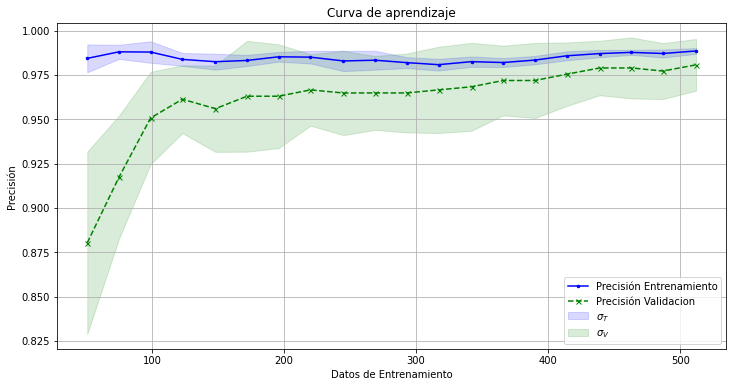

In [6]:
#Grafiquemos
#
fig1, ax1 = plt.subplots(figsize=(12, 6))
ax1.set(xlabel="Datos de Entrenamiento",ylabel="Precisión",title="Curva de aprendizaje")
# Tamano de datos de entrenamiento vs Precision del modelo a los datos de entrenamiento
ax1.plot(train_sizes, train_mean, color='blue', marker='.', markersize=5, label='Precisión Entrenamiento')
# Dispersion
ax1.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue', label=r'$\sigma_T$')
# Tamano de datos de entrenamiento vs Precision del modelo a los datos de testeo
ax1.plot(train_sizes, test_mean, color='green', marker='x', markersize=5, linestyle='--', label='Precisión Validacion')
# Dispersion
ax1.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green', label=r'$\sigma_V$')
plt.grid()
plt.legend(loc='lower right')
plt.show()